In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/Credit.csv"
CreditData = pd.read_csv(url)
CreditData.head(10)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [2]:
del CreditData['Unnamed: 0']

#### Let's look at correlation matrix. This time, we only explore the quantitative variables that affect Credit Balance. From your preliminary analysis, which 3 variables seem to affect Balance the most? In our goal is interpretation; can we use these 3 variables simultaneously? Why?

In [3]:
CreditData.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


Answer: It seems like Income, Limit, and Rating have the highest impact on Balance. We cannot use these 3 variables simultaneously because they are highly correlated.  

#### There are few categorical variables, let's first create dummy variables for them


In [4]:

RaceDummy = pd.get_dummies(CreditData.Ethnicity, prefix = 'Race')
del RaceDummy['Race_African American']

GenderDummy = pd.get_dummies(CreditData.Gender, prefix = 'Gender')
del GenderDummy['Gender_ Male']  

MarriedDummy = pd.get_dummies(CreditData.Married, prefix = 'Married')
del MarriedDummy['Married_No']

StudentDummy = pd.get_dummies(CreditData.Student, prefix = 'Student')
del StudentDummy['Student_No']

CreditData = pd.concat([CreditData, RaceDummy,GenderDummy,MarriedDummy,StudentDummy], axis=1)

CreditData.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Race_Asian,Race_Caucasian,Gender_Female,Married_Yes,Student_Yes
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,1,0,1,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,0,1,1,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,0,0,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0,1,0,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,1,0,1,0


# Now it's time for some fun!

#### By a regression line, use Education, Ethnicity, Gender, Age, Cards, and Income to predict Balance. 

First Step, find the coefficients of your regression line

In [5]:
X = CreditData[['Education','Race_Asian','Race_Caucasian','Gender_Female','Age','Cards','Income']]
X.head(2)
y = CreditData['Balance']
from sklearn.linear_model import LinearRegression  #import
linreg = LinearRegression() #Instantiate
linreg.fit(X,y)     #Fit
print(linreg.intercept_)
print(linreg.coef_)

230.042354393
[  1.64553607  -6.54603078   3.47497641  27.12543123  -2.32970547
  33.62953508   6.27995894]


Second Step, find the p-values of your estimates. You have a few variables try to show your p-values along side the names of the variables.

In [6]:
from sklearn import feature_selection
pvals = feature_selection.f_regression(X,y)[1] 
zip(X.columns.values,pvals)

[('Education', 0.87230640156710226),
 ('Race_Asian', 0.84489564436221742),
 ('Race_Caucasian', 0.94772751139663791),
 ('Gender_Female', 0.66851610550260099),
 ('Age', 0.97081387233013317),
 ('Cards', 0.084176555599370956),
 ('Income', 1.0308858025894099e-22)]

Which of your coefficients are significant at significance level 5%?

Answer: Only income is. 

#### What is the R-Squared of your model?

In [7]:
R_Squared = linreg.score(X,y)
print(R_Squared)

0.232312608335


#### How do we interpret this value?

Answer: 23.2% of the variability of our model was captured by the proposed linear model.

#### Now focus on two of the most significant variables from your previous model and re-run your regression model. This time, try to use a function to return all the values you are interested in. You may borrow from what covered in Lecture 5 ipython lecture.

P Values: [  1.03088580e-22   8.41765556e-02]
Coefficients: [  6.07099859  31.83812895]
y-intercept: 151.329946349
R-Squared: 0.223991751622


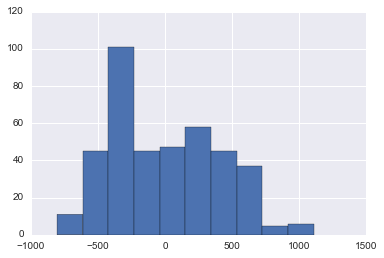

In [8]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. 
    pvals = feature_selection.f_regression(X, y)[1]
    algo.fit(X,y)
    residuals = (y-algo.predict(X))

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals)
    # keep the model
    return algo

X = CreditData[['Income','Cards']]
y = CreditData['Balance']

lm_using_function = get_linear_model_metrics(X,y,linreg)

In comparison to the previous model, did our R-Squared increase or decrease? Why?

Answer: It decreased since we used subset of the variables we used earlier. This does not mean that the precision of our model has incrased. R-Squared on its own is not a good measure to compare two models. 

#### Now let's regress Balance on Gender alone. After running your regression lines, do you have enough evidence to claim that females having more balance than males? (Hint: Look at the p-value of the Gender coefficient. If it is significant then you will have evidence to support that claim, otherwise you cannot support the statement.

P Values: [ 0.66851611]
Coefficients: [ 19.73312308]
y-intercept: 509.803108808
R-Squared: 0.000461132964496


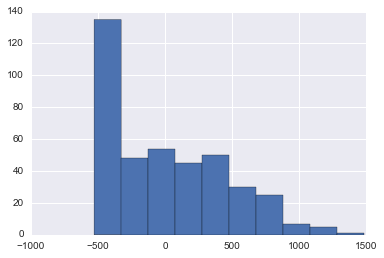

In [9]:
X = CreditData[['Gender_Female']]
y = CreditData['Balance']
lm_using_function = get_linear_model_metrics(X,y,linreg)

Answer: Our p-value is extremely high. Although the coefficient of dummy variable for females is positive we cannot claim females spend more on average than males.

#### Now let's regress Balance on Ethnicity. After running your regression lines, do you have enough evidence to claim that some ethnic groups carry more balance than others? (Hint: Look at the p-value of  your dummy variables. If it is significant then you will have evidence to support that claim, otherwise you cannot support that statement.

P Values: [ 0.84489564  0.94772751]
Coefficients: [-18.68627451 -12.50251256]
y-intercept: 531.0
R-Squared: 0.000218807443049


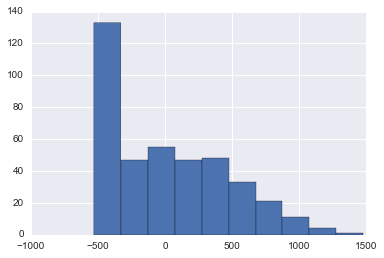

In [10]:
X = CreditData[['Race_Asian','Race_Caucasian']]
y = CreditData['Balance']
lm_using_function = get_linear_model_metrics(X,y,linreg)

Answer: Again our p-values are extremely low. We don't have enough evidence to say an ethnic group carries more balance than others.

#### I know you get tired of this but for the last time regress Balance on Studentship status. After running your regression lines, do you have enough evidence to claim that students  carry more balance than others? (Hint: Look at the p-value of the your dummy variables. If it is significant then you will have evidence to support that claim, otherwise you cannot support the statement.


P Values: [  1.48773411e-07]
Coefficients: [ 396.45555556]
y-intercept: 480.369444444
R-Squared: 0.0670900898871


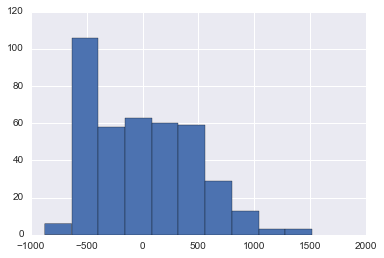

In [11]:
X = CreditData[['Student_Yes']]
y = CreditData['Balance']
lm_using_function = get_linear_model_metrics(X,y,linreg)

Answer: (If your answer is yes, interpret the results). Yes, we have enough evidence to support that students are on average carrying 396 dollars more balance than non-students.

#### No let's consider effect of students and income on balance simoltanously. Let's start with a regression line.

P Values: [  1.48773411e-07   1.03088580e-22]
Coefficients: [ 382.67053884    5.98433557]
y-intercept: 211.142964398
R-Squared: 0.277458888967


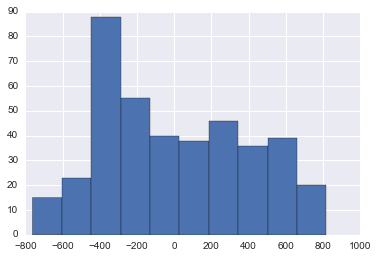

In [12]:
X = CreditData[['Student_Yes','Income']]
y = CreditData['Balance']
lm_using_function = get_linear_model_metrics(X,y,linreg)

#### Are all of our regression coefficients significant? If yes, interpret them.

Answer: Yes, both coefficients are significant. We find that fixing income, students on average tend to carry 382 dollars more balance. Also, on average higher income earners tend to carry more balance on their credit cards. For every 1000 dollars additional income, people on average carry around 6 dollars more balance.

#### Now let's explore interaction between income and studentship. Let's start with a regression line

In [13]:
# First generate a column for interation term
CreditData['Student_Income'] = CreditData['Student_Yes']*CreditData['Income']

P Values: [  1.48773411e-07   1.03088580e-22   4.61768368e-08]
Coefficients: [ 476.67584321    6.21816874   -1.99915087]
y-intercept: 200.62315295
R-Squared: 0.279883703062


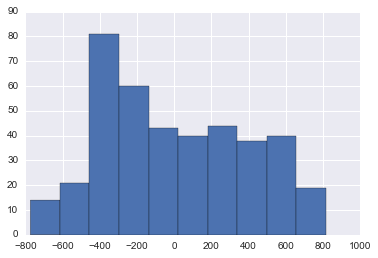

In [14]:
X = CreditData[['Student_Yes','Income','Student_Income']]
y = CreditData['Balance']
lm_using_function = get_linear_model_metrics(X,y,linreg)

#### Are our coefficients signifincant? It they are write down your regression line below:

Yes, they are all significant. 

Balance_Hat = 200.62 + 476.67 * Student_Dummy + 6.21 * Income - 1.999 * Income * Student_Dummy

#### Is there any income level at which students and non-students on average carry same level of balance?

Answer: 

Non-Student: Balance_Hat = 200.62 + 6.21 Income
   Students: Balance_Hat = 200.62 + 476.67 + (6.21 - 1.999) * Income
   
Theoretically, at 238.454 income, these two groups carry the same amount of balance. Since this range of income is higher than observed values for students, it is safe to say that within the range of our observations, students on average carry more balance. 

We interpret the results this way. We say, students on average carry 476.67 dollars more than non-students. But for every 1000 dollars they make this difference between the balance that students and non-students are carrying is decreased by around 2 dollars. 